In [1]:
# import sys
# !{sys.executable} -m pip install pythainlp emoji

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid")

In [3]:
from pythainlp.tokenize import word_tokenize

In [4]:
df = pd.read_csv("sentiment.tsv",sep='\t')

In [5]:
df['token']=df['text'].apply(lambda x:word_tokenize(x))

In [6]:
from pythainlp.spell import correct
import re

In [7]:
import emoji

split_emoji = emoji.get_emoji_regexp()

In [8]:
df['token']=df['token'].apply(lambda x: [a for y in x for a in split_emoji.split(y) if not bool(re.search(r'^\s*$',a))])

In [10]:
df['token']=df['token'].apply(lambda x: [re.sub(r'^([ก-ฮ])\1{3,}$', r'\1\1', t) for t in x])
df['token']=df['token'].apply(lambda x: [re.sub(r'^5{3,}$', r'LAUGHT', t) for t in x])

In [11]:
# df[df['token'].apply(lambda x:len(x)<=1)]

In [12]:
# df[df['token'].apply(lambda x:len(x)<=1)]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train,test = train_test_split(df,test_size=0.15,random_state=69)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
import identity_tokenizer

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer.identity_tokenizer,lowercase=False,max_df=0.9,min_df=10,ngram_range=(1,2))

In [17]:
X_train = tfidf.fit_transform(train['token'].values.tolist()).toarray()

In [18]:
y_train = train['label'].values

In [19]:
X_train.shape

(23378, 9938)

In [20]:
X_test = tfidf.transform(test['token'].values.tolist()).toarray()
y_test = test['label'].values

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


In [23]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# #fit logistic regression models
# params = {
#     'max_features':['log2','sqrt']
# }
# classifier = GridSearchCV(
#     RandomForestClassifier(n_estimators=10,random_state=69),
#     param_grid=params,scoring='f1_weighted',cv=3)
# classifier.fit(X_train,y_train)
# y_pred = classifier.predict(X_test)
# print(classifier.best_params_)
# print("acc:",accuracy_score(y_test,y_pred))
# print("f1:",f1_score(y_test,y_pred,average='weighted'))

In [24]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier
# #fit logistic regression models
# params = {
#     'penalty':['l1','l2']
# }
# classifier = GridSearchCV(
#     SGDClassifier(random_state=69,max_iter =100,tol=1e-3),
#     param_grid=params,scoring='f1_weighted',cv=3,verbose=3)
# classifier.fit(X_train,y_train)
# print(classifier.best_params_)
# y_pred = classifier.predict(X_test)
# print("acc:",accuracy_score(y_test,y_pred))
# print("f1:",f1_score(y_test,y_pred,average='weighted'))

In [25]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# #fit logistic regression models
# params = {
#     'C':[1,2,3],
# }
# classifier = GridSearchCV(
#     SVC(random_state=69,verbose=True,gamma='scale'),
#     param_grid=params,scoring='f1_weighted',cv=3,verbose=3)
# classifier.fit(X_train,y_train)
# print(classifier.best_params_)
# y_pred = classifier.predict(X_test)
# print("acc:",accuracy_score(y_test,y_pred))
# print("f1:",f1_score(y_test,y_pred,average='weighted'))

In [26]:
from sklearn.linear_model import LogisticRegression

#fit logistic regression models
params = {
    'C':[0.5,1,1.5,2,2.5,3],
    'penalty':['l1','l2']
}
classifier = GridSearchCV(
    LogisticRegression(solver='liblinear',multi_class='ovr',random_state=69),
    param_grid=params,scoring='f1_weighted',cv=3)
classifier.fit(X_train,y_train)



GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=69, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.5, 1, 1.5, 2, 2.5, 3], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [27]:
classifier.best_params_

{'C': 2, 'penalty': 'l1'}

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
print("acc:",accuracy_score(y_test,y_pred))
print("f1:",f1_score(y_test,y_pred,average='weighted'))

acc: 0.7515753756665051
f1: 0.7400248346305768


In [30]:
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test,y_pred,average='weighted'))

(0.7446685193166842, 0.7515753756665051, 0.7400248346305768, None)


In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,y_pred,labels=[-1,0,1])

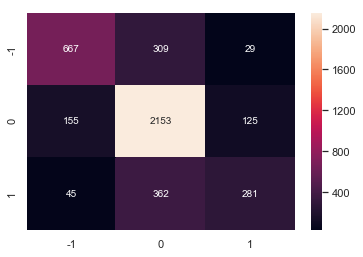

In [32]:
sns.heatmap(mat.astype(int), annot=True,fmt='d',xticklabels=[-1,0,1],yticklabels=[-1,0,1])

In [33]:
print(precision_recall_fscore_support(y_test,y_pred))

(array([0.76931949, 0.76239377, 0.64597701]), array([0.66368159, 0.88491574, 0.40843023]), array([0.71260684, 0.81909835, 0.50044524]), array([1005, 2433,  688]))


In [34]:
# import pickle

# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(classifier,model_file)

# with open('vectorize.pkl', 'wb') as vectorize_file:
#     pickle.dump(tfidf,vectorize_file)


In [35]:
test['predict'] = y_pred

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
test[['text','label','predict']].to_csv('solution.tsv',sep='\t',index=None)